In [206]:
import numpy as np
import pandas as pd
import sklearn
import nltk
import textblob

In [207]:
df=pd.read_csv("C:/Users/vikas/OneDrive/Desktop/ml data/end to end project datasets/resumeshortlist/UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [208]:
df.shape

(962, 2)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [210]:
df.describe().transpose()

,count,unique,top,freq
Category,962,25,Java Developer,84
Resume,962,166,"Technical Skills Web Technologies: Angular JS,...",18


In [211]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [212]:
sample_df=pd.DataFrame(df['Category'].value_counts())
sample_df=sample_df.reset_index()
sample_df.columns=['position','category']
sample_df

,position,category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


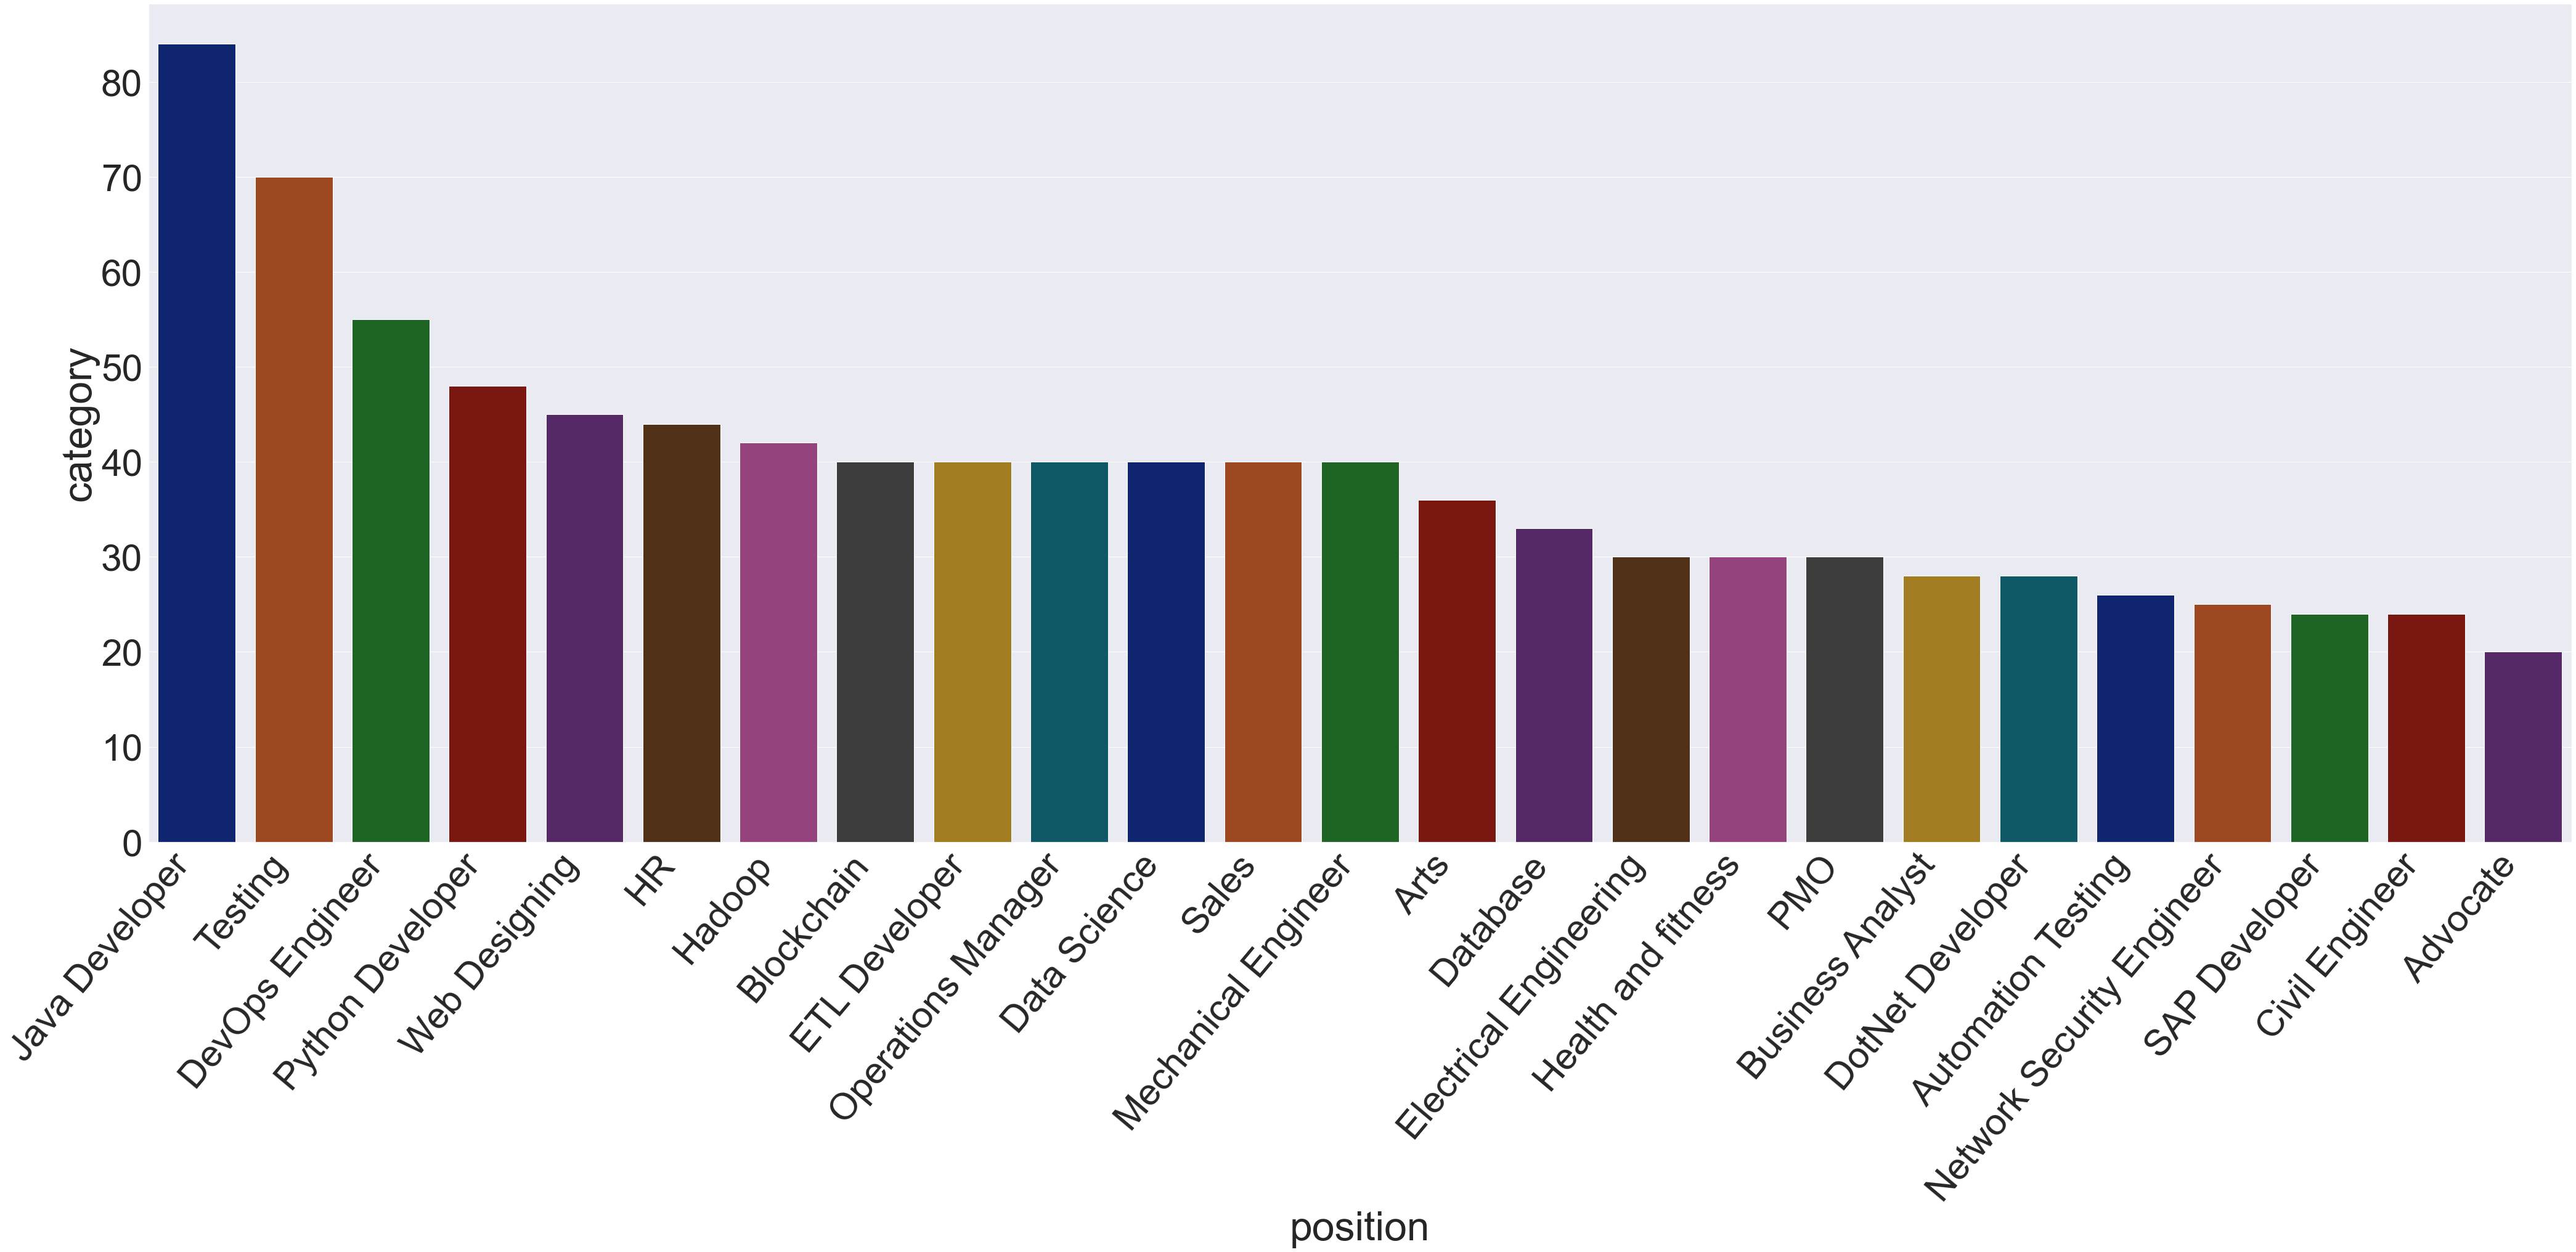

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(60,30))
sns.set_style('dark')
sns.set_theme('talk')
sns.set(font_scale=5.5)
ax=sns.barplot(data=sample_df,x='position',y='category',palette="dark")
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()


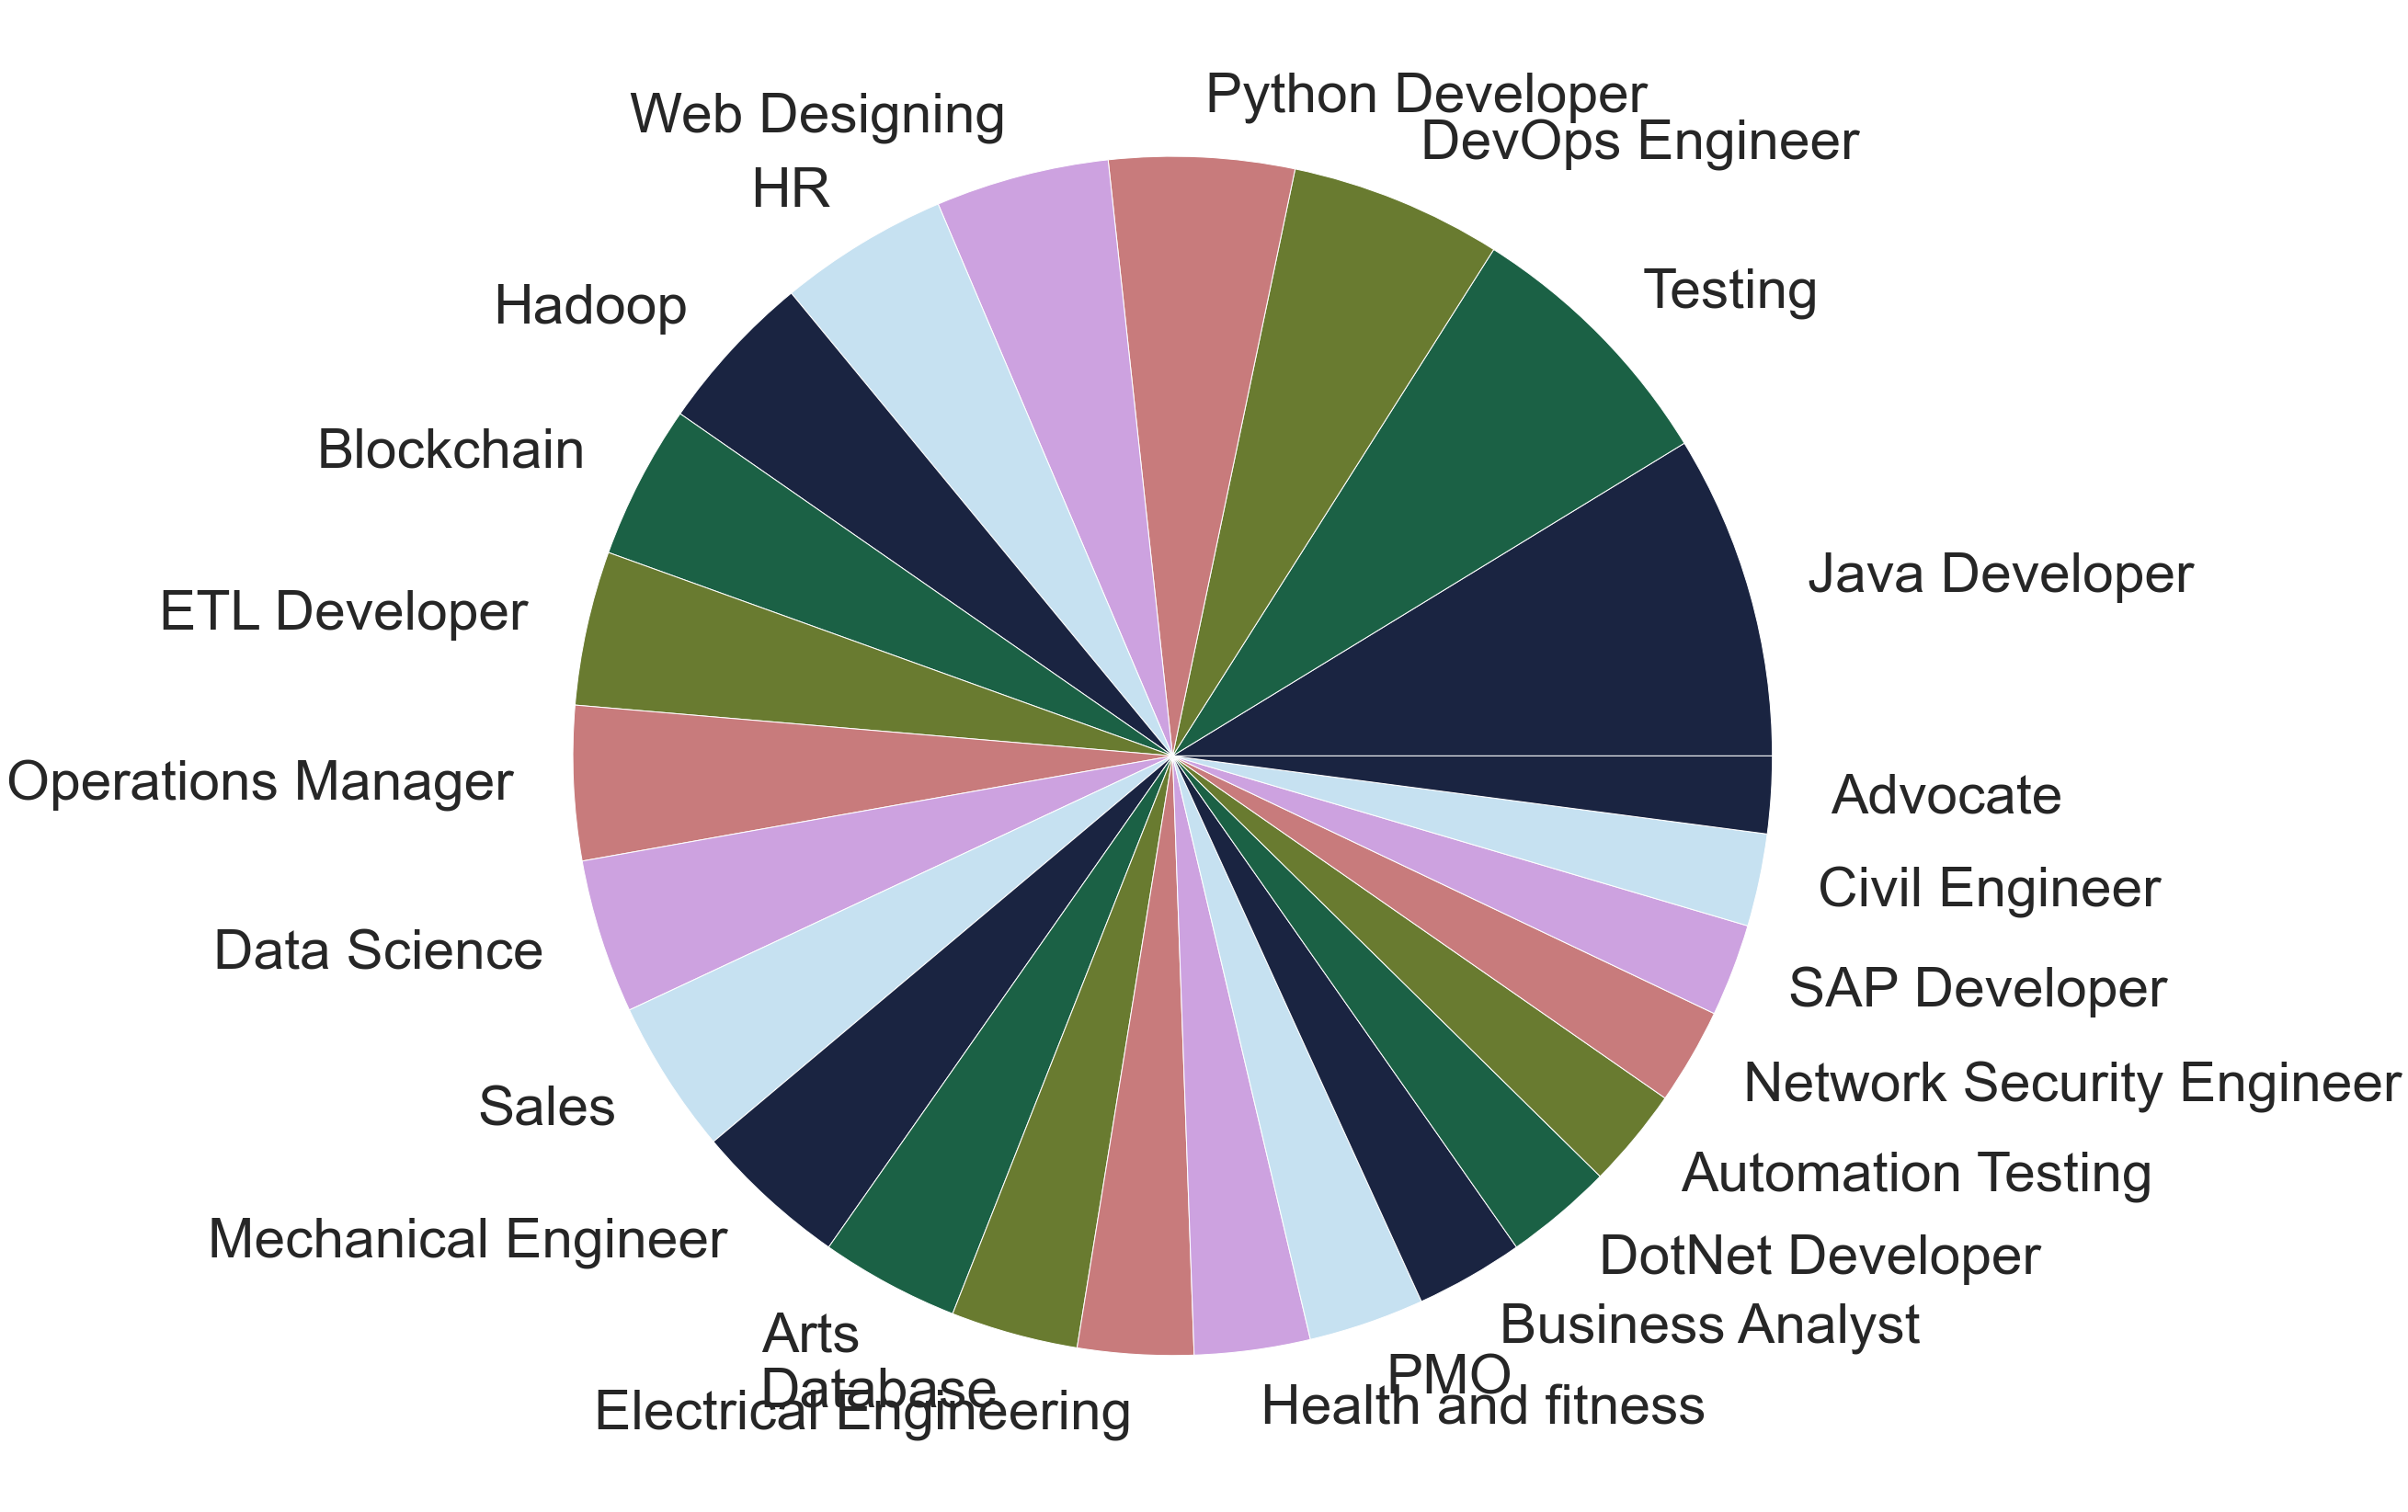

In [214]:
sns.set_style('dark')
plt.figure(figsize=(30,30))
position=list(sample_df['position'])
data=list(sample_df['category'])
colors = sns.color_palette('cubehelix')
plt.pie(x=data,labels=position,colors=colors)
plt.show()

In [215]:
import re,string
def remover(text):
    text=re.sub(r'[{},\r\n,*,â¢,]',"",text)
    text=re.sub(r'[@,%]',"",text)
    return text
remover("%vikash")

'vikash'

In [216]:
df['Resume']=df['Resume'].apply(lambda x: remover(x))
df

,Category,Resume
0,Data Science,Skills Programming Languages: Python (pandas ...
1,Data Science,Education Details May 2013 to May 2017 B.E U...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA...
4,Data Science,Education Details MCA YMCAUST Faridabad H...
...,...,...
957,Testing,Computer Skills: Proficient in MS office (Wor...
958,Testing,Willingness to accept the challenges. Positi...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to l...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [217]:
print(string.punctuation)
def punct_removal(text):
    for i in string.punctuation:
        if i in text:
            text=text.replace(i,"")
    return text
punct_removal("#$%&'(resume")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'resume'

In [218]:
df['Resume']=df['Resume'].apply(lambda x:punct_removal(x))
df

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas nu...
1,Data Science,Education Details May 2013 to May 2017 BE UI...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA...
4,Data Science,Education Details MCA YMCAUST Faridabad H...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word ...
958,Testing,Willingness to accept the challenges Positiv...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to l...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Po...


In [219]:
def lower(text):
    text=text.lower()
    return text

df['Resume']=df["Resume"].apply(lambda x: lower(x))
df

,Category,Resume
0,Data Science,skills programming languages python pandas nu...
1,Data Science,education details may 2013 to may 2017 be ui...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana...
4,Data Science,education details mca ymcaust faridabad h...
...,...,...
957,Testing,computer skills proficient in ms office word ...
958,Testing,willingness to accept the challenges positiv...
959,Testing,personal skills quick learner eagerness to l...
960,Testing,computer skills software knowledge mspower po...


In [220]:
def int_removal(text):
    for i in text:
        if i.isdigit():
            text=text.replace(i,"")
    return text
int_removal("2025vikash")

'vikash'

In [221]:
df["Resume"]=df['Resume'].apply(lambda x:int_removal(x))
df

,Category,Resume
0,Data Science,skills programming languages python pandas nu...
1,Data Science,education details may to may be uitrgpvdat...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana...
4,Data Science,education details mca ymcaust faridabad h...
...,...,...
957,Testing,computer skills proficient in ms office word ...
958,Testing,willingness to accept the challenges positiv...
959,Testing,personal skills quick learner eagerness to l...
960,Testing,computer skills software knowledge mspower po...


In [222]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

def stemming(text):
    text=" ".join(ps.stem(x) for x in text.split())
    return text
stemming("corporation")

'corpor'

In [223]:
df["Resume"]=df['Resume'].apply(lambda x:stemming(x))
df

,Category,Resume
0,Data Science,skill program languag python panda numpi scipi...
1,Data Science,educ detail may to may be uitrgpvdata scientis...
2,Data Science,area of interest deep learn control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,educ detail mca ymcaust faridabad haryanadata ...
...,...,...
957,Testing,comput skill profici in ms offic word basic ex...
958,Testing,willing to accept the challeng posit think goo...
959,Testing,person skill quick learner eager to learn new ...
960,Testing,comput skill softwar knowledg mspower point ms...


In [224]:
from nltk import WordNetLemmatizer
wl=WordNetLemmatizer()
def lemmatizer(text):
    text="".join(wl.lemmatize(x) for x in text)
    return text

lemmatizer(nltk.word_tokenize("rocks"))

'rock'

In [225]:
df["Resume"]=df['Resume'].apply(lambda x:lemmatizer(x))
df

,Category,Resume
0,Data Science,skill program languag python panda numpi scipi...
1,Data Science,educ detail may to may be uitrgpvdata scientis...
2,Data Science,area of interest deep learn control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,educ detail mca ymcaust faridabad haryanadata ...
...,...,...
957,Testing,comput skill profici in ms offic word basic ex...
958,Testing,willing to accept the challeng posit think goo...
959,Testing,person skill quick learner eager to learn new ...
960,Testing,comput skill softwar knowledg mspower point ms...


In [226]:
from nltk.corpus import stopwords
words=stopwords.words('english')
print(words,end='')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [227]:
def stopwords_remover(text):
    text="  ".join(x for x in text.split() if x not in words)
    return text

stopwords_remover("in out most should vikash now")


'vikash'

In [228]:
df["Resume"]=df['Resume'].apply(lambda x:stopwords_remover(x))
df

,Category,Resume
0,Data Science,skill program languag python panda numpi scipi...
1,Data Science,educ detail may may uitrgpvdata scientist data...
2,Data Science,area interest deep learn control system design...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,educ detail mca ymcaust faridabad haryanadata ...
...,...,...
957,Testing,comput skill profici ms offic word basic excel...
958,Testing,willing accept challeng posit think good learn...
959,Testing,person skill quick learner eager learn new thi...
960,Testing,comput skill softwar knowledg mspower point ms...


In [229]:
x=df.Resume
y=df.Category

In [230]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=1)

In [234]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf_fit=tf.fit_transform(xtrain)
print(tf_fit.shape)

(769, 7535)


In [235]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(tf_fit,ytrain)
lr.predict(tf_fit)

array(['Blockchain', 'Mechanical Engineer', 'Hadoop', 'Testing', 'Hadoop',
       'Electrical Engineering', 'Mechanical Engineer', 'DevOps Engineer',
       'Testing', 'Java Developer', 'SAP Developer', 'Web Designing',
       'Data Science', 'DotNet Developer', 'Advocate',
       'Network Security Engineer', 'DevOps Engineer',
       'Automation Testing', 'Operations Manager', 'Blockchain',
       'Network Security Engineer', 'Arts', 'Operations Manager',
       'Web Designing', 'Hadoop', 'ETL Developer', 'Testing',
       'Operations Manager', 'Blockchain', 'Database', 'Arts',
       'Mechanical Engineer', 'HR', 'Automation Testing',
       'Python Developer', 'Arts', 'PMO', 'Mechanical Engineer', 'Arts',
       'PMO', 'DevOps Engineer', 'Operations Manager', 'Data Science',
       'Database', 'Hadoop', 'Hadoop', 'Civil Engineer', 'Java Developer',
       'Web Designing', 'PMO', 'Business Analyst', 'DevOps Engineer',
       'DevOps Engineer', 'Blockchain', 'Business Analyst', 'Arts',

In [262]:
inputs=[input()]
mod_tf=tf.transform(inputs)
mod_pred=lr.predict(mod_tf)
mod_pred

array(['HR'], dtype=object)

In [246]:
testtransform=tf.transform(xtest)

testpred=lr.predict(testtransform)

In [251]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(ytest,testpred)
ac

0.9948186528497409